# Full Dirichlet VPINN example

In [1]:
import os; os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import logging; logging.getLogger('tensorflow').setLevel(logging.ERROR)

from MeshLib import MeshLib as ml

from VPINN_tri_final import *

from PROBDEF import PROBDEF

tfk = tf.keras
tfkl = tf.keras.layers

# importing probdef 
pb = PROBDEF()

2023-12-14 19:23:26.249750: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 19:23:27.942262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



my_types lib imported

MeshLib imported

generate mesh lib imported

interpolator_lib imported

settings_lib imported 




In [2]:
# seed for reproducibility
initializer = tf.keras.initializers.GlorotUniform(seed=54)


# mesh init
domain = ((0, 0), (1, 0), (1, 1), (0, 1))
#mesh = generate_mesh(domain, 0.01)

### H1 and L2 error

In [3]:
# Get quad pairs
from numpy.polynomial import legendre

def get_quad_rule(n: int):
    # Degree of the Legendre polynomial (number of nodes - 1)

    # Nodes and weights for Gauss-Legendre quadrature
    nodes, weights = legendre.leggauss(n + 1)



    nodes=(nodes+1.0)/2.0


    # Nodes=np.array([nodes],dtype=np_type)

    Weights=np.array([weights],dtype=np_type)
    w = Weights.T @ Weights
    w = np.reshape(w, (-1,1))


    x, y =np.meshgrid(nodes,nodes)


    x = x.flatten()
    y = y.flatten()
 



    xy=np.array([x,y]).T


    return xy, w/4


### NETWORKS WITH EXACT BC

In [4]:
# seed for reproducibility
initializer = tf.keras.initializers.GlorotUniform(seed=100)
domain = ((0, 0), (1, 0), (1, 1), (0, 1))

In [5]:
def plot_BC(u_exact, u_NN_BC_):
    """both numpy functions"""
    x = np.linspace(0, 1, 200, dtype=np.float64)

    eval_exact = [u_exact(x[i], 1.0) for i in range(len(x))]

    eval_net = [u_NN_BC_(x[i], 1.0) for i in range(len(x))]

    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10,7))  # Set the figure size

    # Plot the data
    plt.subplot(221)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("top edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.0) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.0) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("bottom edge")
    plt.legend()

    eval_exact = [u_exact(1.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(1.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("right edge")
    plt.legend()

    eval_exact = [u_exact(0.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("left edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.5) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.5) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10, 7))  # Set the figure size

    # Plot the data
    plt.subplot(221)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.5")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.25) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.25) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.25")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.75) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.75) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.75")
    plt.legend()

    eval_exact = [u_exact(0.5, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.5, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle x=0.50")
    plt.legend()

def helper_colour_plot(x, y, model):

    x_=tf.reshape(x,(-1,1))
    y_=tf.reshape(y,(-1,1))

    eval=tf.concat([x_,y_],axis=1)

    return tf.reshape(model(eval),(tf.shape(x)[0],-1))

def color_plot(model):

    x = np.linspace(0, 1, 1000)
    y = np.linspace(0, 1, 1000)

    X, Y = np.meshgrid(x, y)

    error = np.abs(pb.u_exact_np(X,Y)-helper_colour_plot(X,Y,model))

    fig=plt.imshow(
        error,
        extent=[min(x), max(x), min(y), max(y)],
        vmin=np.min(error),
        vmax=np.max(error)
    )

    plt.title('Error Map')
    plt.colorbar(fig)

    fig.axes.set_autoscale_on(False)

In [6]:
MODEL = tfk.models.Sequential()
MODEL.add(tf.keras.Input(shape=(2,),dtype=tf_type))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

# MODEL.summary()

2023-12-14 19:23:34.126638: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [7]:
mesh_chain = ml.generate_regular_mesh_chain(domain, depth=12, plot=False)
index=2
di = 5
coarse_mesh = mesh_chain[index]
fine_mesh = mesh_chain[index+di]

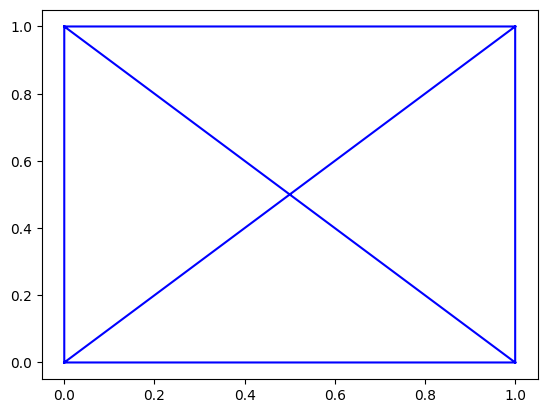

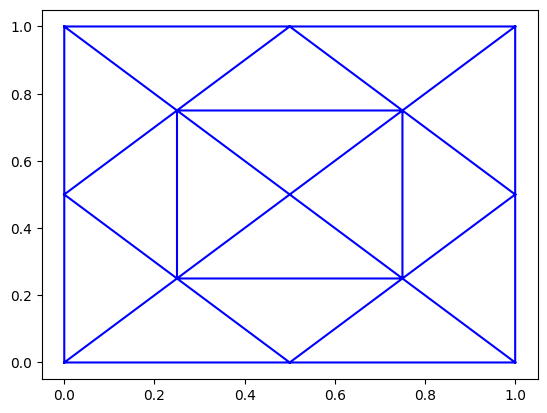

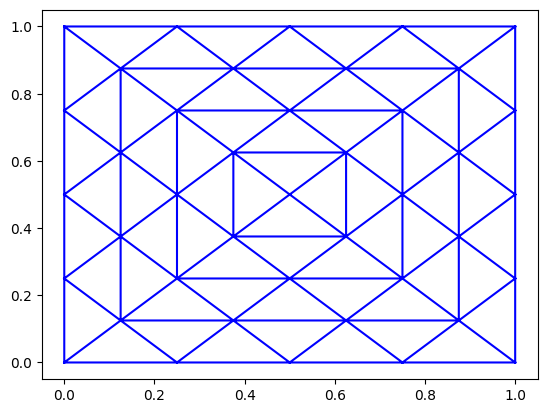

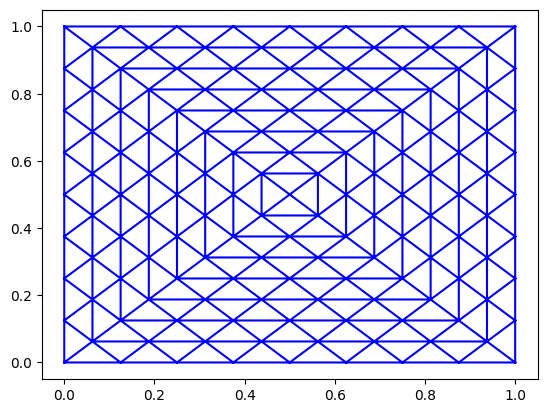

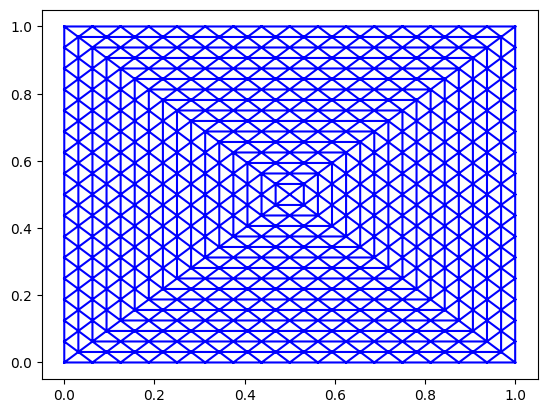

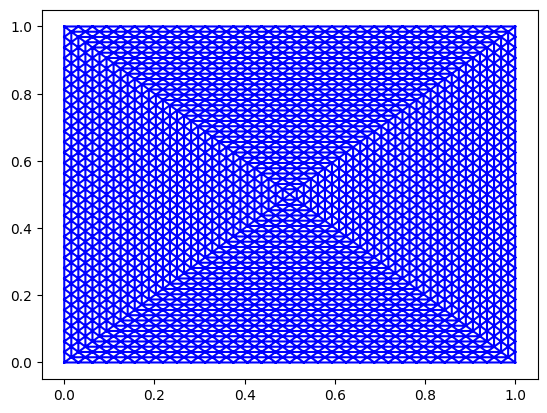

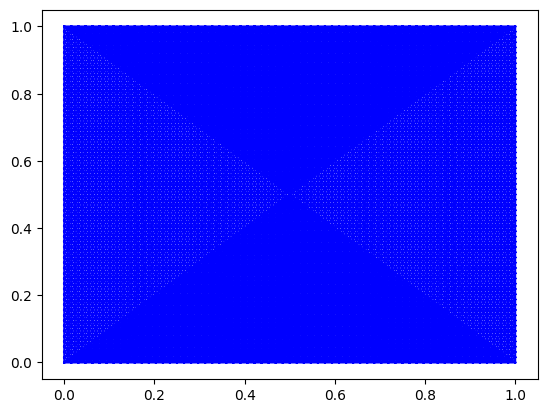

In [8]:
import triangle as tr
import matplotlib.pyplot as plt
import gmsh_worker as gw

geo_file = './unit_square_triangles'
worker = gw.gmsh_worker(geo_file)

worker.construct_base_geo('./geo_core.txt', 0.5, 2, 2)
worker.generate_parallel_chain(True, False, False)


In [9]:
coarse_mesh, fine_mesh = ml.take_parallel_mesh_chain(worker.chain[1],worker.chain[3], 'NDND')

In [10]:
# mesh = coarse_mesh

mesh={}
mesh['vertices']=fine_mesh.vertices
mesh['triangles']=fine_mesh.triangles
mesh['edges']=fine_mesh.edges
mesh['vertex_markers']=fine_mesh.vertex_markers
mesh['edge_markers']=fine_mesh.edge_markers
mesh['keep']=fine_mesh.keep
mesh['edges_index_inside_triangle']=fine_mesh.edges_index_inside_triangle

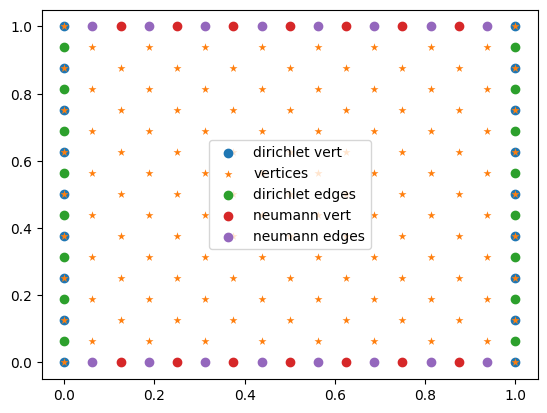

In [11]:
dirichlet=mesh['vertices'][mesh['vertex_markers'][:,0]==1]
dirichlet_edges=mesh['edges'][mesh['edge_markers'][:,0]==1]

neumann=mesh['vertices'][mesh['vertex_markers'][:,0]==2]
neumann_edges=mesh['edges'][mesh['edge_markers'][:,0]==2]

plt.scatter(dirichlet[:,0],dirichlet[:,1])
plt.scatter(mesh['vertices'][:,0],mesh['vertices'][:,1],marker='*',linewidths=0.01)

middle_=mesh['vertices'][dirichlet_edges[:,1]]+mesh['vertices'][dirichlet_edges[:,0]]
middle_=middle_/2
plt.scatter(middle_[:,0],middle_[:,1])

plt.scatter(neumann[:,0],neumann[:,1])
middle=mesh['vertices'][neumann_edges[:,1]]+mesh['vertices'][neumann_edges[:,0]]
middle=middle/2
plt.scatter(middle[:,0],middle[:,1])

plt.legend(['dirichlet vert ','vertices','dirichlet edges','neumann vert','neumann edges'])

In [12]:
# for i in range(len(mesh['vertices'])):
#     print(vp.mesh['vertex_markers'][i], " ", vp.F_total_vertices[i]) 

In [13]:
# x=vp.mesh['vertex_markers']
# val=vp.F_total_vertices

# for i in range(len(x)):
#     print(x[i],'->',val[i])

In [14]:
# a = tf.constant([[1,2],[1,2],[1,2],[1,2],[1,2]], dtype=tf_type)
# b = vp.standard_bc(a)
# print(b)

In [15]:
# import sympy as sp

# # Define symbolic variables
# x, y = sp.symbols('x y')

# # Define a vector field function
# u=sp.sin(3.2*x*(x - y)) *sp.cos(4.3*y + x) + sp.sin(4.6*(x + 2*y))*sp.cos(2.6*(y - 2*x))

# mu=2 + sp.sin(x + 2*y)

# sigma=sp.exp(x/2 -y/3) +2

# beta1=sp.sqrt(x-y**2 +5) 
# beta2=sp.sqrt(y-x**2 +5)

# # Calculate the gradient
# gradient_vector = [sp.diff(u, x),sp.diff(u, y)]

# f =-sp.diff(mu *gradient_vector[0], x) - sp.diff(mu*gradient_vector[1], y) +beta1 *(gradient_vector[0]) +beta2*(gradient_vector[1])+sigma*u

# print(f)

ratio =  3.9999999999999964
h =  0.12500000000033273


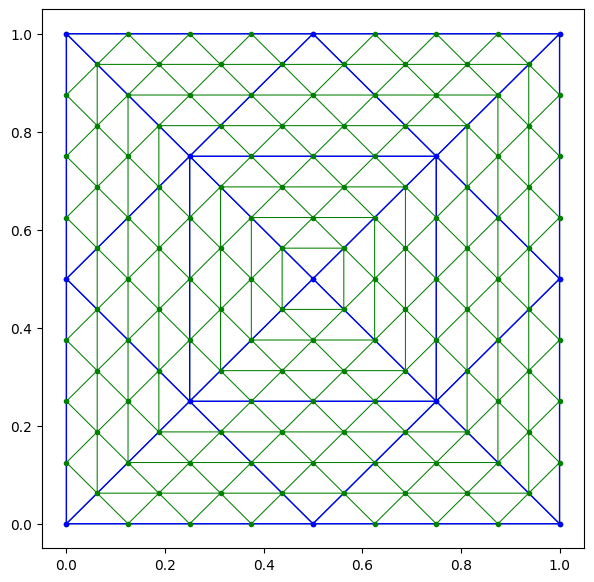

In [16]:
print('ratio = ',coarse_mesh.h_max /fine_mesh.h_max)
print('h = ',fine_mesh.h_max)

ml.compare(coarse_mesh, fine_mesh,False)

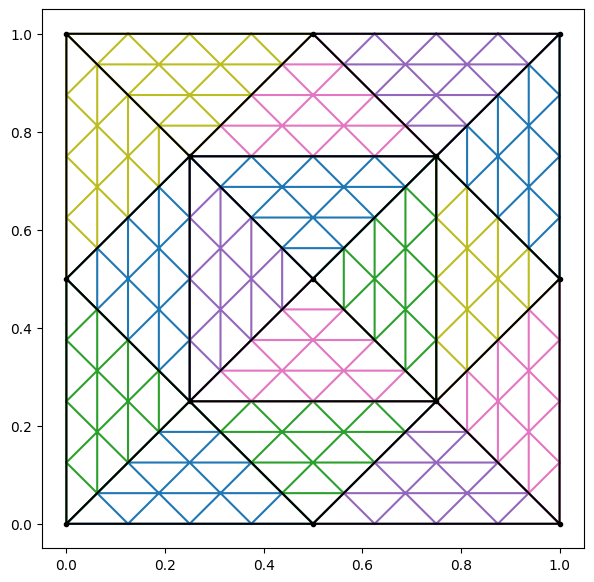

tf.Tensor([3 4], shape=(2,), dtype=int32)
Triangle #0
1st edge, vertex 2
Triangle #1
Triangle #2
1st edge, vertex 1
1st edge, vertex 2
Triangle #3
Triangle #4
Triangle #5
Triangle #6
Triangle #7
Triangle #8
1st edge, vertex 1
1st edge, vertex 2
Triangle #9
Triangle #10
1st edge, vertex 1
1st edge, vertex 2
Triangle #11
Triangle #12
Triangle #13
Triangle #14
Triangle #15
Triangle #16
Triangle #17
Triangle #18
Triangle #19
Triangle #20
Triangle #21
Triangle #22
Triangle #23
Triangle #24
Triangle #25
Triangle #26
Triangle #27
Triangle #28
Triangle #29
Triangle #30
Triangle #31
Triangle #32
1st edge, vertex 1
1st edge, vertex 2
Triangle #33
Triangle #34
1st edge, vertex 1
1st edge, vertex 2
Triangle #35
Triangle #36
Triangle #37
Triangle #38
Triangle #39
Triangle #40
1st edge, vertex 1
1st edge, vertex 2
Triangle #41
Triangle #42
1st edge, vertex 1
Triangle #43
Triangle #44
Triangle #45
Triangle #46
Triangle #47
Triangle #48
Triangle #49
Triangle #50
Triangle #51
Triangle #52
Triangle #53


In [17]:
N_test = 1
r_interpoaltion = 4

params = {'scheme': 'VPINNs', 'N_test': N_test, 'r_interpolation': r_interpoaltion}

vp=VPINN(pb,params,fine_mesh,False,coarse_mesh,MODEL)
model=vp.u_NN_BC

In [18]:
x=vp.mesh['vertex_markers']
val=vp.F_total_vertices

for i in range(len(x)):
    print(x[i],'->',val[i])

[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[2] -> tf.Tensor([-0.5084624], shape=(1,), dtype=float64)
[2] -> tf.Tensor([-0.08756361], shape=(1,), dtype=float64)
[2] -> tf.Tensor([-1.14739532], shape=(1,), dtype=float64)
[2] -> tf.Tensor([-2.13406349], shape=(1,), dtype=float64)
[2] -> tf.Tensor([-1.40923372], shape=(1,), dtype=float64)
[2] -> tf.Tensor([0.23925927], shape=(1,), dtype=float64)
[2] -> tf.Tensor([0.23472682], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)


[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[2] -> tf.Tensor([-1.47583378], shape=(1,), dtype=float64)
[2] -> tf.Tensor([-0.08491839], shape=(1,), dtype=float64)
[2] -> tf.Tensor([-0.34463477], shape=(1,), dtype=float64)
[2] -> tf.Tensor([-2.03673378], shape=(1,), dtype=float64)
[2] -> tf.Tensor([-2.73856586], shape=(1,), dtype=float64)
[2] -> tf.Tensor([-1.05697582], shape=(1,), dtype=float64)
[2] -> tf.Tensor([1.36423093], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.69389273], shape=(1,), dtype=float64)
[0] -> tf.Tensor([1.6631555], 

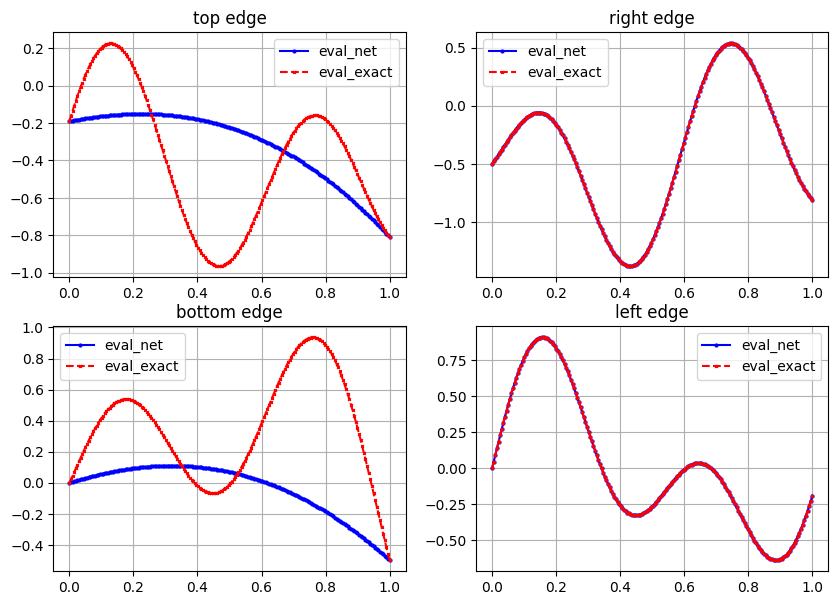

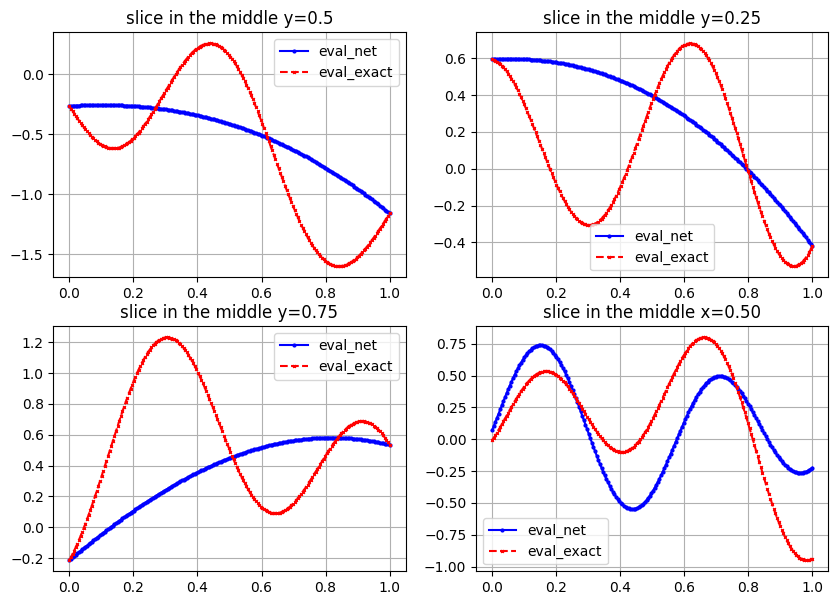

In [19]:
vp.set_bc_model(vp.standard_bc)

# helper function to treat the net as a lamda function
def model_np(x, y):
    eval = tf.constant([[x, y]], dtype=tf.float64)
    return model(eval).numpy()[0, 0]

model =vp.NN_imposeBC

plot_BC(pb.u_exact_np,model_np)

In [20]:
history=vp.train(10000,0.0001)

Iteration: 0 loss: 5.1671869227 time: 137.45953559875488
Iteration: 10 loss: 5.1587444380 time: 0.18810534477233887
Iteration: 20 loss: 5.1503658174 time: 0.20011162757873535
Iteration: 30 loss: 5.1417649231 time: 0.2379748821258545
Iteration: 40 loss: 5.1326994514 time: 0.2585475444793701
Iteration: 50 loss: 5.1230320231 time: 0.23952698707580566
Iteration: 60 loss: 5.1127476507 time: 0.2416210174560547
Iteration: 70 loss: 5.1019360786 time: 0.25995445251464844
Iteration: 80 loss: 5.0907821402 time: 0.2183675765991211
Iteration: 90 loss: 5.0795510613 time: 0.2139894962310791
Iteration: 100 loss: 5.0685479399 time: 0.194366455078125
Iteration: 110 loss: 5.0580390058 time: 0.23409152030944824
Iteration: 120 loss: 5.0481522438 time: 0.21812868118286133
Iteration: 130 loss: 5.0388222174 time: 0.24001479148864746
Iteration: 140 loss: 5.0298506318 time: 0.22379255294799805
Iteration: 150 loss: 5.0210480064 time: 0.25646090507507324
Iteration: 160 loss: 5.0123072658 time: 0.24518942832946777

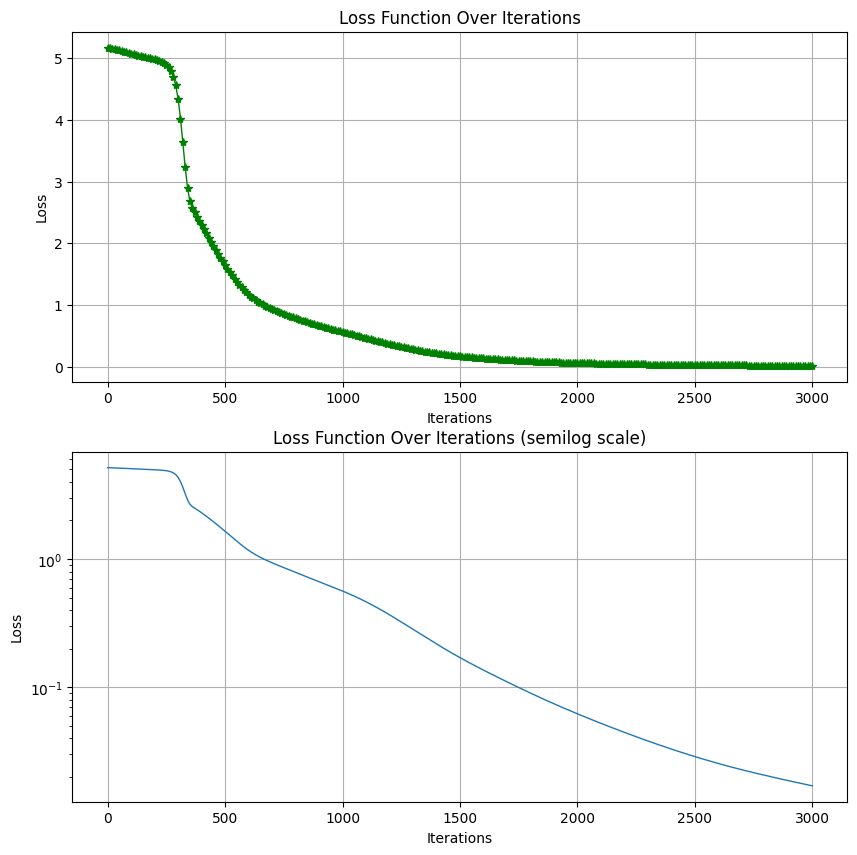

In [ ]:
def plot_loss(history):  
    iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

    plt.figure(figsize=(10, 10))

    plt.subplot(211)
    plt.plot(iterations, history, marker='*',color='green',linewidth=1)
    plt.title('Loss Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()

    plt.subplot(212)
    plt.semilogy(iterations, history,linewidth=1)
    plt.title('Loss Function Over Iterations (semilog scale)')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()
plot_loss(history)

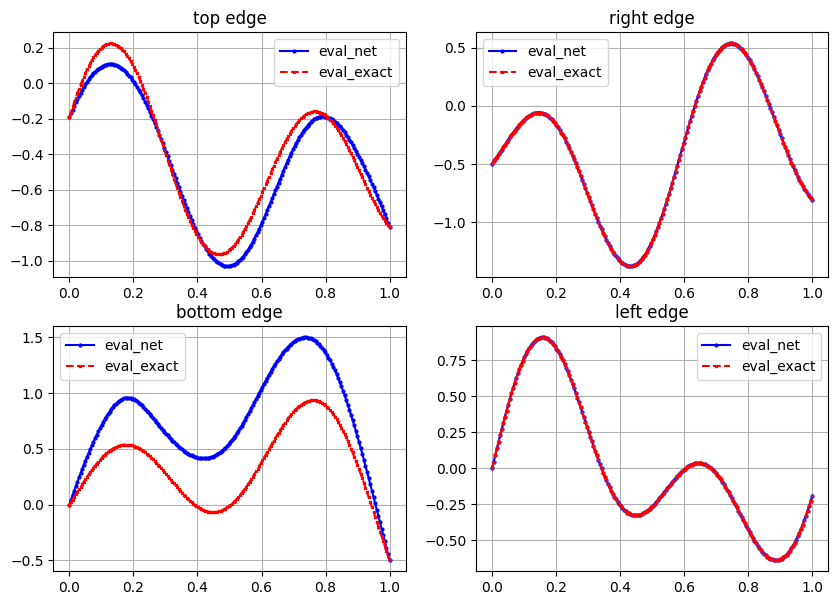

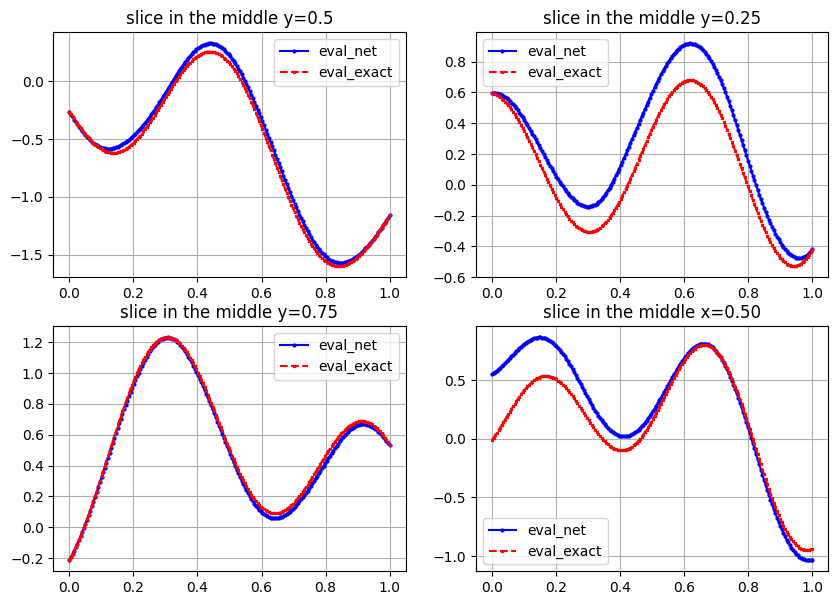

In [ ]:
plot_BC(pb.u_exact_np,model_np)

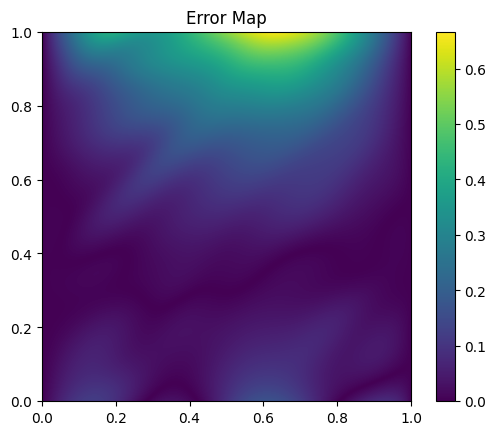

In [ ]:
color_plot(vp.NN_imposeBC)

In [ ]:
raise NotImplementedError(":)")

NotImplementedError: :)

In [ ]:
def L2_error(xy, w):
    
    u_NN = vp.NN_imposeBC(xy)

    # Find the exact solution
    u_ex = pb.u_exact_np(xy[:,0], xy[:,1])
    u_ex = np.reshape(u_ex, (-1,1))

    integrand = (u_ex - u_NN)**2


    # Find the difference between exact and NN 
    # return (u_ex - u_NN)**2

    return np.sqrt(np.sum(w*integrand))

def semi_H1_error(xy, w):

    # Find the gradient of the exact solution
    grad_ex = np.array([pb.dudx(xy[:,0], xy[:,1]), pb.dudy(xy[:,0], xy[:,1])],dtype=np_type).T


    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.constant(xy, dtype=tf_type))

    


    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    pw_diff = tf.reduce_sum(tf.square(pw_diff),axis=1)

    pw_diff=tf.reshape(pw_diff,(-1,1))


    return np.sqrt(np.sum(pw_diff*w))

def semi_H1_error_lambda(x,y):
    xy=np.array([[x,y]],dtype=np_type)

    # Find the gradient of the exact solution
    grad_ex = np.array([pb.dudx(xy[:,0], xy[:,1]), pb.dudy(xy[:,0], xy[:,1])],dtype=np_type).T


    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.constant(xy, dtype=tf_type))

    


    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    pw_diff = tf.reduce_sum(tf.square(pw_diff))

    return pw_diff.numpy()

#set quad rule for calc errors
xy, w = get_quad_rule(60)

semi_H1_err = semi_H1_error(xy, w)
L2_error_ = L2_error(xy, w)
H1_err = np.sqrt(L2_error_**2 + semi_H1_err**2)

print(f"L2 error: {L2_error_}")
print(f"semi H1 error: {semi_H1_err}")
print(f"H1 error: {H1_err}")

AttributeError: 'PROBDEF' object has no attribute 'dudx'

### H1 and L2 convergence

Error   : Unknown number option 'Mesh.ElementType'


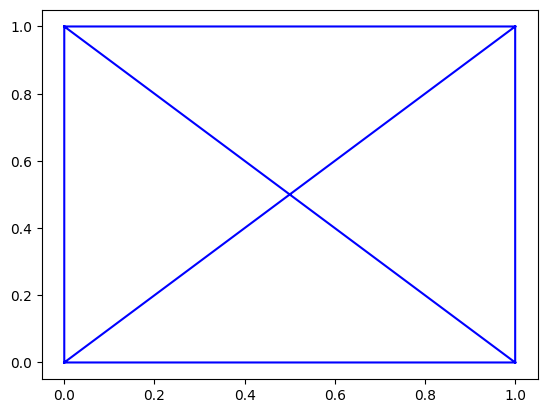

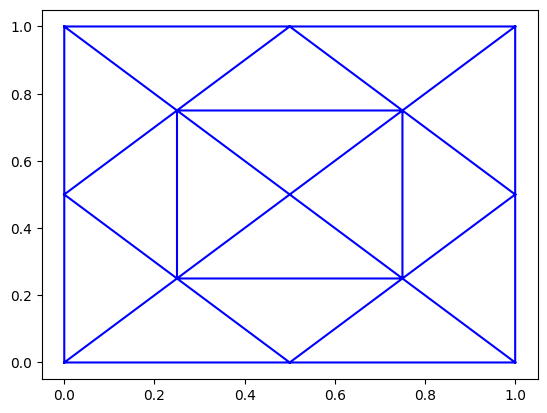

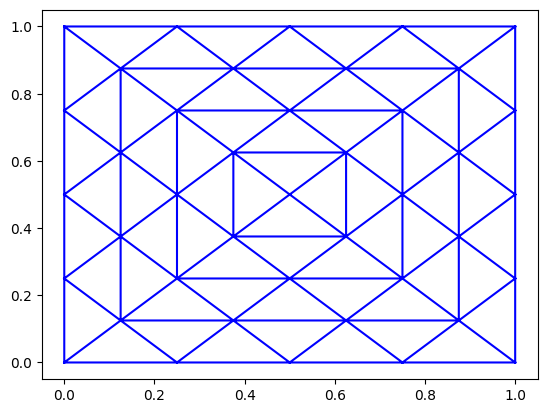

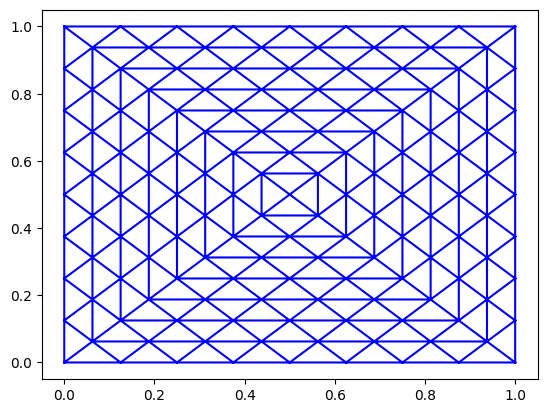

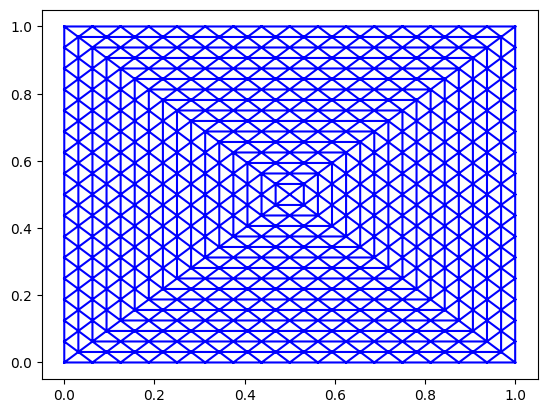

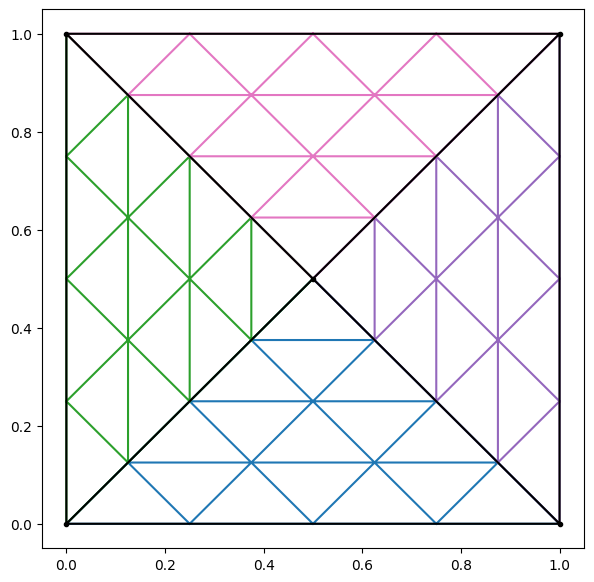

-->mesh : 
     n_triangles :  64
     n_vertices  :  41
     n_edges     :  104
     h_max           :  0.2500000000006653
     h_min           :  0.1767766952961665
-->test_fun      : 
     order       :  1
     dof         :  25
Iteration: 0 loss: 0.0055159504 time: 10.231952428817749
Iteration: 10 loss: 0.0019876994 time: 0.061811208724975586
Iteration: 20 loss: 0.0015218286 time: 0.11242818832397461
Iteration: 30 loss: 0.0014107147 time: 0.1008903980255127
Iteration: 40 loss: 0.0013575338 time: 0.06923604011535645
Iteration: 50 loss: 0.0013295105 time: 0.06628155708312988
Iteration: 60 loss: 0.0012967334 time: 0.06528639793395996
Iteration: 70 loss: 0.0012517210 time: 0.07816553115844727
Iteration: 80 loss: 0.0011793175 time: 0.07625198364257812
Iteration: 90 loss: 0.0010619670 time: 0.06760001182556152
Iteration: 100 loss: 0.0009295493 time: 0.058028221130371094
Iteration: 110 loss: 0.0008958883 time: 0.048616647720336914
Iteration: 120 loss: 0.0008556106 time: 0.0515408515930175

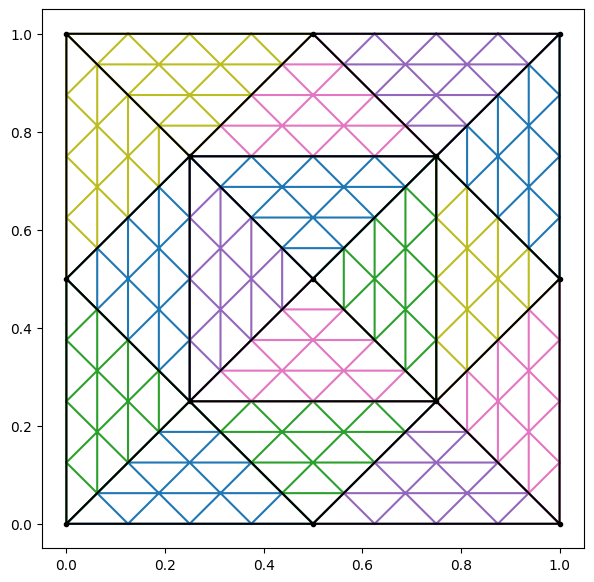

-->mesh : 
     n_triangles :  256
     n_vertices  :  145
     n_edges     :  400
     h_max           :  0.12500000000033273
     h_min           :  0.0883883476480272
-->test_fun      : 
     order       :  1
     dof         :  113
Iteration: 0 loss: 0.0003389050 time: 33.491297483444214
Iteration: 10 loss: 0.0001183384 time: 0.10893702507019043
Iteration: 20 loss: 0.0000717558 time: 0.1093292236328125
Iteration: 30 loss: 0.0000599907 time: 0.12181639671325684
Iteration: 40 loss: 0.0000572734 time: 0.12066054344177246
Iteration: 50 loss: 0.0000549131 time: 0.12749457359313965
Iteration: 60 loss: 0.0000539146 time: 0.13000130653381348
Iteration: 70 loss: 0.0000527804 time: 0.12825751304626465
Iteration: 80 loss: 0.0000516393 time: 0.126190185546875
Iteration: 90 loss: 0.0000502271 time: 0.13323402404785156
Iteration: 100 loss: 0.0000483333 time: 0.133009672164917
Iteration: 110 loss: 0.0000457068 time: 0.12922167778015137
Iteration: 120 loss: 0.0000420760 time: 0.1345195770263672
It

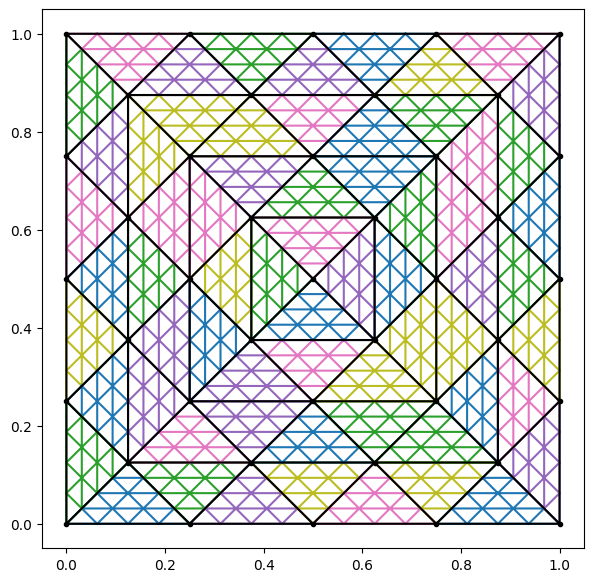

-->mesh : 
     n_triangles :  1024
     n_vertices  :  545
     n_edges     :  1568
     h_max           :  0.06250000000016642
     h_min           :  0.04419417382399782
-->test_fun      : 
     order       :  1
     dof         :  481
Iteration: 0 loss: 0.0000205413 time: 141.53820896148682
Iteration: 10 loss: 0.0000069166 time: 0.38463711738586426
Iteration: 20 loss: 0.0000063009 time: 0.37023258209228516
Iteration: 30 loss: 0.0000045179 time: 0.36191415786743164
Iteration: 40 loss: 0.0000037337 time: 0.36170506477355957
Iteration: 50 loss: 0.0000034011 time: 0.36751532554626465
Iteration: 60 loss: 0.0000033066 time: 0.3582894802093506
Iteration: 70 loss: 0.0000032789 time: 0.39667773246765137
Iteration: 80 loss: 0.0000032413 time: 0.3663008213043213
Iteration: 90 loss: 0.0000032134 time: 0.3675241470336914
Iteration: 100 loss: 0.0000031891 time: 0.3754093647003174
Iteration: 110 loss: 0.0000031631 time: 0.36648011207580566
Iteration: 120 loss: 0.0000031365 time: 0.375694274902343

In [ ]:
def restart_model():
    model = tfk.models.Sequential()
    model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))
    return model

xy, w = get_quad_rule(50)

H1 = []
L2 = []
semi = []
h = []
H = []

worker = gw.gmsh_worker(geo_file)

worker.construct_base_geo('./geo_core.txt', 1, 5, 1)
worker.generate_parallel_chain(True)
# mesh_chain = ml.generate_regular_mesh_chain(domain, depth=12, plot=False)
index=0
di = 2

for index in [0,1,2]:
    coarse_mesh, fine_mesh = ml.take_parallel_mesh_chain(
                        worker.chain[index],
                        worker.chain[index+di])

    model = restart_model()
    vp=VPINN(pb,params,fine_mesh,False,coarse_mesh,model)
    history=vp.train(5000, 0.001)


    semi_H1_err = semi_H1_error(xy, w)
    L2_error_ = L2_error(xy, w)
    H1_err = np.sqrt(L2_error_**2 + semi_H1_err**2)

    H1.append(H1_err)
    semi.append(semi_H1_err)
    L2.append(L2_error_)

    h.append(fine_mesh.h_max)
    H.append(coarse_mesh.h_max)
    
    

In [ ]:
# import numpy as np
h = np.array(h)
H1 = np.array(H1)
L2 = np.array(L2)
semi = np.array(semi)



In [ ]:
# slope_H1, intercept_H1 = np.polyfit(h, H1, 1)
# slope_L2, intercept_L2 = np.polyfit(h, L2, 1)

#coeffs = np.polyfit(np.log10(h), np.log10(H1), 1)
#polynomial = np.poly1d(coeffs)
#log10_H1_fit = polynomial(np.log10(h))

#print(f"H1 rate: {coeffs[0]}")

coeffs = np.polyfit(np.log10(h), np.log10(semi), 1)
polynomial = np.poly1d(coeffs)
log10_semi_H1_fit = polynomial(np.log10(h))

print(f"semi H1 rate: {coeffs[0]}")

coeffs = np.polyfit(np.log10(h), np.log10(L2), 1)
polynomial = np.poly1d(coeffs)
log10_L2_fit = polynomial(np.log10(h))

print(f"L2 rate: {coeffs[0]}")




semi H1 rate: 2.9036397095943487
L2 rate: 3.0714625269423452


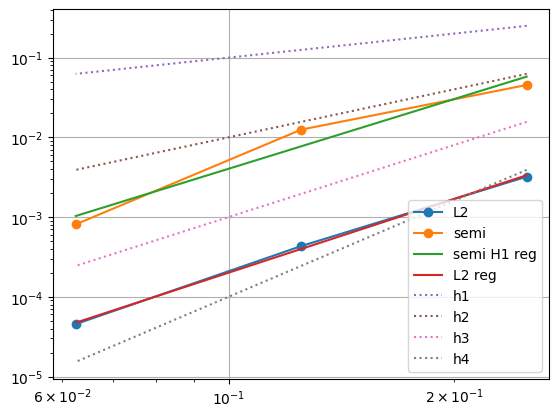

In [ ]:
#plt.loglog(h, H1, marker='o', label='H1')
plt.loglog(h, L2, marker='o', label='L2')
plt.loglog(h, semi, marker='o', label='semi')
plt.loglog(h, 10**log10_semi_H1_fit,label='semi H1 reg')
plt.loglog(h, 10**log10_L2_fit,label='L2 reg ')
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.loglog(h, h*h*h, linestyle=':', label='h3')
plt.loglog(h, h*h*h*h, linestyle=':', label='h4')
plt.grid()
plt.legend()

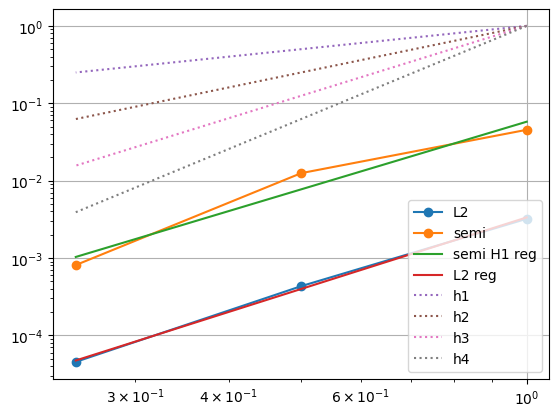

In [ ]:
#plt.loglog(h, H1, marker='o', label='H1')
h = 4*h
plt.loglog(h, L2, marker='o', label='L2')
plt.loglog(h, semi, marker='o', label='semi')
plt.loglog(h, 10**log10_semi_H1_fit,label='semi H1 reg')
plt.loglog(h, 10**log10_L2_fit,label='L2 reg ')
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.loglog(h, h*h*h, linestyle=':', label='h3')
plt.loglog(h, h*h*h*h, linestyle=':', label='h4')
plt.grid()
plt.legend()